# Polynomial Regression
we will perform a polynomial regression on a randomly generated dataset

### Importing Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



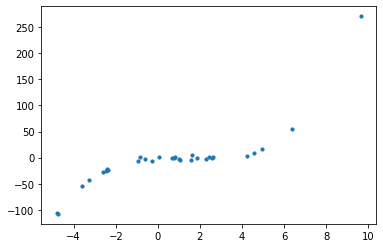

In [6]:
#creating random dataset
np.random.seed(0)
x = 2 -3 * np.random.normal(0,1,30)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(0, 3, 30) 
plt.scatter(x,y,s=10)

Applying LinearRegression

In [7]:
#transforming the data to include the other axis
x = x[:,np.newaxis]
y = y[:, np.newaxis]

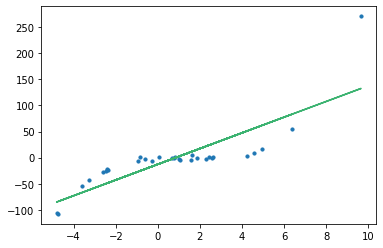

In [13]:
model = LinearRegression()
model.fit(x,y)

#predictitng
y_pred = model.predict(x)

#visualizing the predicted data
plt.scatter(x,y,s=10)
plt.plot(x,y_pred,c='mediumseagreen')
plt.show()

In [15]:
#calculating mse
mse = np.sum((y_pred - y) ** 2)
print(mse)

35537.9637251047


In [25]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)

#printing our values
print('Slope: ',model.coef_)
print('Intercept: ',model.intercept_)
print('Root Squared Mean Error: ',rmse)
print('R2 Score: ',r2)

Slope:  [[ 0.         11.49911865  1.18321728]]
Intercept:  [-23.40833282]
Root Squared Mean Error:  34.41800097095738
R2 Score:  0.6680958125801718


# Polynomial Regression

To solve underfitting, complex equation is needed to be added
Polynomial features from scikit-learn library will be used

In [24]:
#degree is thenumber of features to be used in the model
#
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#create a new instance of linear regression
model = LinearRegression()
model.fit(x_poly,y)

#predicting
y_poly_pred = model.predict(x_poly)

In [27]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print('RMSE is: ',rmse)
print('R2 score: ',r2)

RMSE is:  29.38615397597226
R2 score:  0.7580492646555343


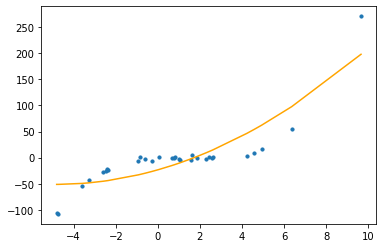

In [31]:
#visualizing
plt.scatter(x,y,s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred),key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,color = 'orange')
plt.show()

## **Observation**

1. The RMSE found after polynomial regression has decreased than in Linear Regression because the distance of the real points from the line of fit(predicted values) is much less than the latter
2. Degree of the polynomial feature related to the number of features that are predicted. to perform a cuboid curve the degree would be three.